#### 𝟏.𝐈𝐦𝐩𝐨𝐫𝐭𝐚𝐧𝐭 𝐋𝐢𝐛𝐫𝐚𝐫𝐢𝐞𝐬

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings('ignore')

#### 𝟐.𝐑𝐞𝐚𝐝𝐢𝐧𝐠 𝐃𝐚𝐭𝐚𝐬𝐞𝐭

In [2]:
#𝑹𝒆𝒂𝒅𝒊𝒏𝒈 𝑫𝒂𝒕𝒂𝒔𝒆𝒕
df = pd.read_csv('Telecom Customer Churn.csv')
df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

#### 𝟑.𝐄𝐱𝐩𝐥𝐨𝐫𝐚𝐭𝐨𝐫𝐲 𝐃𝐚𝐭𝐚 𝐀𝐧𝐚𝐥𝐲𝐬𝐢𝐬(𝐄𝐃𝐀)

In [3]:
#B𝒂𝒔𝒊𝒄 𝑰𝒏𝒇𝒐𝒓𝒎𝒂𝒕𝒊𝒐𝒏 𝒂𝒏𝒅 𝑺𝒖𝒎𝒎𝒂𝒓𝒚 𝑺𝒕𝒂𝒕𝒊𝒔𝒕𝒊𝒄𝒔
# Basic Info
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [4]:
df = df.drop(columns=['customerID'])


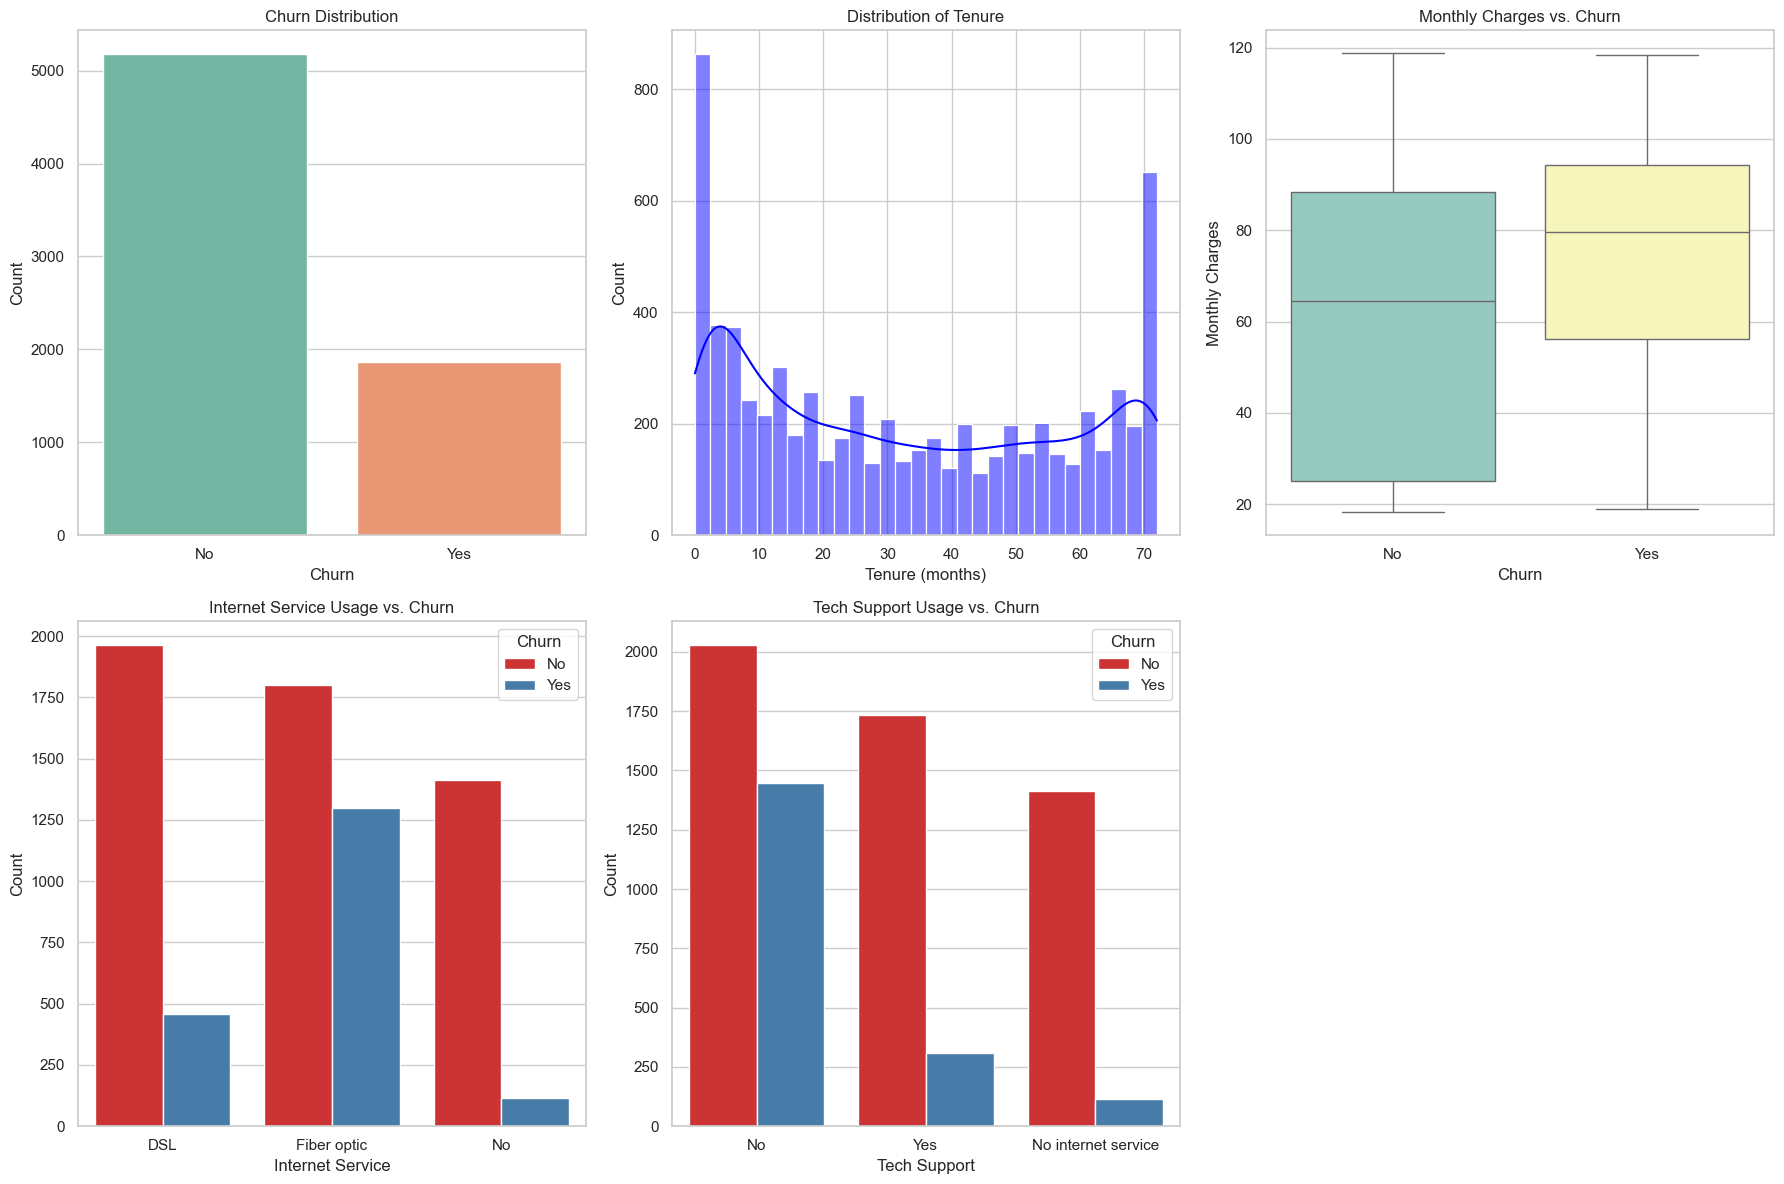

<Figure size 640x480 with 0 Axes>

In [5]:
#𝑪𝒂𝒕𝒆𝒈𝒐𝒓𝒊𝒄𝒂𝒍 𝑽𝒂𝒓𝒊𝒂𝒃𝒍𝒆 𝑨𝒏𝒂𝒍𝒚𝒔𝒊𝒔

# Set the visual theme
sns.set(style="whitegrid")

# Create a figure with 2 rows and 3 columns for the subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Churn Distribution
sns.countplot(df, x='Churn', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Churn Distribution')
axes[0, 0].set_xlabel('Churn')
axes[0, 0].set_ylabel('Count')

# Tenure Distribution
sns.histplot(df, x='tenure', kde=True, bins=30, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Tenure')
axes[0, 1].set_xlabel('Tenure (months)')
axes[0, 1].set_ylabel('Count')

# Monthly Charges vs. Churn
sns.boxplot(df, x='Churn', y='MonthlyCharges', palette='Set3', ax=axes[0, 2])
axes[0, 2].set_title('Monthly Charges vs. Churn')
axes[0, 2].set_xlabel('Churn')
axes[0, 2].set_ylabel('Monthly Charges')

# Service Usage vs. Churn (InternetService)
sns.countplot(df, x='InternetService', hue='Churn', palette='Set1', ax=axes[1, 0])
axes[1, 0].set_title('Internet Service Usage vs. Churn')
axes[1, 0].set_xlabel('Internet Service')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Churn')

# Service Usage vs. Churn (TechSupport)
sns.countplot(df, x='TechSupport', hue='Churn', palette='Set1', ax=axes[1, 1])
axes[1, 1].set_title('Tech Support Usage vs. Churn')
axes[1, 1].set_xlabel('Tech Support')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Churn')

# Remove the empty subplot (if any)
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('pic.png')


In [6]:
# 𝑫𝒊𝒔𝒑𝒍𝒂𝒚 𝒃𝒂𝒔𝒊𝒄 𝒊𝒏𝒇𝒐 𝒂𝒏𝒅 𝒔𝒖𝒎𝒎𝒂𝒓𝒚 𝒔𝒕𝒂𝒕𝒊𝒔𝒕𝒊𝒄𝒔
dataset_info = df.info()
summary_statistics = df.describe()
missing_values = df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### 4.𝐃𝐚𝐭𝐚 𝐏𝐫𝐞𝐩𝐫𝐨𝐜𝐞𝐬𝐬𝐢𝐧𝐠

In [7]:
#𝑴𝒊𝒔𝒔𝒊𝒏𝒈 𝒗𝒂𝒍𝒖𝒆𝒔
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#𝑫𝒕𝒚𝒑𝒆 𝑪𝒉𝒂𝒏𝒈𝒊𝒏𝒈
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:

# Feature Scaling

# Select numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

# Fill missing values in TotalCharges
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check the first few rows of the scaled data
print(df.head())


   gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
0  Female      -0.439916     Yes         No -1.277445           No   
1    Male      -0.439916      No         No  0.066327          Yes   
2    Male      -0.439916      No         No -1.236724          Yes   
3    Male      -0.439916      No         No  0.514251           No   
4  Female      -0.439916      No         No -1.236724          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes  

#### 𝟓.𝐂𝐥𝐚𝐬𝐬 𝐈𝐦𝐛𝐚𝐥𝐚𝐧𝐜𝐞 𝐑𝐞𝐬𝐨𝐥𝐮𝐭𝐢𝐨𝐧

In [11]:


# Calculate class counts and distribution
class_counts = df['Churn'].value_counts()
class_distribution = class_counts / len(df)

# Print class counts and distribution
print("Class Counts:")
print(class_counts)
print("\nClass Distribution:")
print(class_distribution)

# Calculate class imbalance metrics
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()
class_balance_ratio = class_counts[majority_class] / class_counts[minority_class]
class_imbalance_ratio = class_counts[minority_class] / class_counts[majority_class]

# Print class imbalance metrics
print("\nClass Balance Ratio:", class_balance_ratio)
print("Class Imbalance Ratio:", class_imbalance_ratio)

# Check for significant class imbalance
if class_balance_ratio > 5:
    print("Significant class imbalance detected")


Class Counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Class Distribution:
Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64

Class Balance Ratio: 2.7683253076511503
Class Imbalance Ratio: 0.36122922303826827


#### 6.𝐎𝐮𝐭𝐥𝐢𝐞𝐫𝐬 𝐃𝐞𝐭𝐞𝐜𝐭𝐢𝐨𝐧

In [12]:
#𝑶𝒖𝒕𝒍𝒊𝒆𝒓𝒔 𝑫𝒆𝒕𝒆𝒄𝒕𝒊𝒐𝒏

# Calculate Z-scores for the numerical columns
z_scores = np.abs(scaler.fit_transform(df[numerical_cols]))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Display the outliers
outliers_data = df[outliers]
print(f"Number of outliers detected: {outliers_data.shape[0]}")
outliers_data.head()


Number of outliers detected: 0


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [13]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


#### 𝟕.𝐅𝐞𝐚𝐭𝐮𝐫𝐞 𝐒𝐞𝐥𝐞𝐜𝐭𝐢𝐨𝐧

##### 1.🇫​🇪​🇦​🇹​🇺​🇷​🇪​ 🇸​🇪​🇱​🇪​🇨​🇹​🇮​🇴​🇳​ 🇺​🇸​🇮​🇳​🇬​ 🇲​🇺​🇹​🇺​🇦​🇱​ 🇮​🇳​🇳​🇫​🇴​🇷​🇲​🇦​🇹​🇮​🇴​🇳​ 🇹​🇪​🇨​🇭​🇳​🇮​🇶​🇺​🇪​

In [14]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [15]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(df, df['Churn'])

In [16]:
# Calculate mutual information
mutual_info = mutual_info_classif(df.drop('Churn', axis=1), df['Churn'])

# Get the feature names
feature_names = df.columns.drop('Churn')

# Combine feature names and mutual information values
mutual_info_df = pd.DataFrame({'feature': feature_names, 'mutual_info': mutual_info})

# Sort by mutual information in descending order
mutual_info_df = mutual_info_df.sort_values('mutual_info', ascending=False)

# Select the top features
top_features = mutual_info_df['feature'].head(10)  # Select top 5 features

print(top_features)


14            Contract
4               tenure
8       OnlineSecurity
7      InternetService
11         TechSupport
9         OnlineBackup
17      MonthlyCharges
10    DeviceProtection
16       PaymentMethod
18        TotalCharges
Name: feature, dtype: object


##### 𝗥𝗲𝗰𝘂𝗿𝘀𝗶𝘃𝗲 𝗙𝗲𝗮𝘁𝘂𝗿𝗲 𝗘𝗹𝗶𝗺𝗶𝗻𝗮𝘁𝗶𝗼𝗻

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = df.drop('Churn', axis=1)  # Drop the 'Churn' column to get features
y = df['Churn']               # 'Churn' column is the target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the model and the number of features to select
selector = RFE(estimator=model, n_features_to_select=2)

# Fit RFE
selector = selector.fit(X_train, y_train)

# Get the selected feature names
selected_feature_names = X.columns[selector.support_]
print(f"Selected Features: {selected_feature_names.tolist()}")

# Transform the dataset to only include selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the model with selected features
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Feature ranking
print("Feature Ranking:")
for i, rank in enumerate(selector.ranking_):
    print(f"Feature {X.columns[i]}: Rank {rank}")


Selected Features: ['tenure', 'Contract']
Accuracy: 0.73
Feature Ranking:
Feature gender: Rank 13
Feature SeniorCitizen: Rank 11
Feature Partner: Rank 18
Feature Dependents: Rank 9
Feature tenure: Rank 1
Feature PhoneService: Rank 3
Feature MultipleLines: Rank 12
Feature InternetService: Rank 8
Feature OnlineSecurity: Rank 6
Feature OnlineBackup: Rank 10
Feature DeviceProtection: Rank 14
Feature TechSupport: Rank 7
Feature StreamingTV: Rank 16
Feature StreamingMovies: Rank 17
Feature Contract: Rank 1
Feature PaperlessBilling: Rank 5
Feature PaymentMethod: Rank 15
Feature MonthlyCharges: Rank 2
Feature TotalCharges: Rank 4


##### 3.🇫​🇪​🇦​🇹​🇺​🇷​🇪​ 🇸​🇪​🇱​🇪​🇨​🇹​🇮​🇴​🇳​ 🇺​🇸​🇮​🇳​🇬​ 🇭​🇾​🇵​🇴​🇹​🇭​🇪​🇸​🇮​🇸​ 🇹​🇪​🇸​🇹​🇮​🇳​🇬​ 🇹​🇪​🇨​🇭​🇳​🇮​🇶​🇺​🇪​

In [18]:

from scipy.stats import ttest_ind, chi2_contingency
import pandas as pd

def feature_relevance_test(data, feature, target):
    if data[feature].dtype == 'object':
        contingency_table = pd.crosstab(data[feature], data[target])
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        if p_val < 0.05:
            print(f"{feature} is relevant (p-value: {p_val:.4f})")
    else:
        t_stat, p_val = ttest_ind(data[feature][data[target] == 0], data[feature][data[target] == 1])
        if p_val < 0.05:
            print(f"{feature} is relevant (p-value: {p_val:.4f})")

data = df
target = 'Churn'
for feature in data.columns:
    if feature != target:
        feature_relevance_test(data, feature, target)



SeniorCitizen is relevant (p-value: 0.0000)
Partner is relevant (p-value: 0.0000)
Dependents is relevant (p-value: 0.0000)
tenure is relevant (p-value: 0.0000)
MultipleLines is relevant (p-value: 0.0014)
InternetService is relevant (p-value: 0.0001)
OnlineSecurity is relevant (p-value: 0.0000)
OnlineBackup is relevant (p-value: 0.0000)
DeviceProtection is relevant (p-value: 0.0000)
TechSupport is relevant (p-value: 0.0000)
StreamingTV is relevant (p-value: 0.0021)
StreamingMovies is relevant (p-value: 0.0012)
Contract is relevant (p-value: 0.0000)
PaperlessBilling is relevant (p-value: 0.0000)
PaymentMethod is relevant (p-value: 0.0000)
MonthlyCharges is relevant (p-value: 0.0000)
TotalCharges is relevant (p-value: 0.0000)


#### 𝐌𝐨𝐝𝐞𝐥 𝐒𝐞𝐥𝐞𝐜𝐭𝐢𝐨𝐧

##### 1.🇱​🇴​🇬​🇮​🇸​🇹​🇮​🇨​ 🇷​🇪​🇬​🇷​🇪​🇸​🇸​🇮​🇴​🇳​(🇫​🇸​1)

In [19]:

# Prepare data
feature_columns = features =["Contract", "tenure", "OnlineSecurity", "TechSupport", 
"InternetService", "PaymentMethod", "MonthlyCharges", "TotalCharges", "DeviceProtection", "OnlineBackup"] # Replace with your actual feature columns
target_column = 'Churn'  # Replace with your actual target column
X = df[feature_columns]
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model1 = LogisticRegression(max_iter=1000)

# Train the model
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8090844570617459
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1036
           1       0.66      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.80      0.81      0.81      1409

Confusion Matrix:
[[923 113]
 [156 217]]


##### 2.🇱​🇴​🇬​🇮​🇸​🇹​🇮​🇨​ 🇷​🇪​🇬​🇷​🇪​🇸​🇸​🇮​🇴​🇳​(🇫​🇸​2)

In [20]:

# Prepare data
feature_columns = features =["Contract", "tenure", "TechSupport", "OnlineSecurity", "MonthlyCharges", 
"TotalCharges", "InternetService", "SeniorCitizen", "PaymentMethod", "PaperlessBilling"]
 # Replace with your actual feature columns
target_column = 'Churn'  # Replace with your actual target column
X = df[feature_columns]
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model2= LogisticRegression(max_iter=1000)

# Train the model
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8161816891412349
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:
[[937  99]
 [160 213]]


##### 3.🇱​🇴​🇬​🇮​🇸​🇹​🇮​🇨​ 🇷​🇪​🇬​🇷​🇪​🇸​🇸​🇮​🇴​🇳​(🇫​🇸​3)

In [21]:

# Prepare data
feature_columns = features =["SeniorCitizen", "Partner", "Dependents", "tenure", "MultipleLines","InternetService", 
"OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies","Contract", 
"PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"]
 # Replace with your actual feature columns
target_column = 'Churn'  # Replace with your actual target column
X = df[feature_columns]
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model3 = LogisticRegression(max_iter=1000)

# Train the model
model3.fit(X_train, y_train)

# Make predictions
y_pred = model3.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8176011355571328
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:
[[939  97]
 [160 213]]


##### 𝟏.𝐃𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐓𝐫𝐞𝐞𝐬(𝐅𝐒𝟏)

In [22]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Contract", "tenure", "OnlineSecurity", "TechSupport", "InternetService", "PaymentMethod", "MonthlyCharges", 
        "TotalCharges", "DeviceProtection", "OnlineBackup"]]
y = df["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7381121362668559
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.51      0.52      0.51       373

    accuracy                           0.74      1409
   macro avg       0.66      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409

Confusion Matrix:
[[847 189]
 [180 193]]


##### 2.𝐃𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐓𝐫𝐞𝐞𝐬(𝐅𝐒2)

In [23]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Contract", "tenure", "TechSupport", "OnlineSecurity", "MonthlyCharges", "TotalCharges", "InternetService", "SeniorCitizen", 
"PaymentMethod", "PaperlessBilling"]]
y = df["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt2.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7210787792760823
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.47      0.50      0.49       373

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409

Confusion Matrix:
[[830 206]
 [187 186]]


##### 3.𝐃𝐞𝐜𝐢𝐬𝐢𝐨𝐧 𝐓𝐫𝐞𝐞𝐬(𝐅𝐒3)

In [24]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = df
X = df[["SeniorCitizen", "Partner", "Dependents", "tenure", "MultipleLines","InternetService",
        "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
        "StreamingMovies","Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", 
        "TotalCharges"]]

y =df["Churn"]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
dt3 = DecisionTreeClassifier(random_state=42)
dt3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7295954577714692
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1036
           1       0.49      0.49      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Confusion Matrix:
[[845 191]
 [190 183]]


##### 𝟏.𝐑𝐚𝐧𝐝𝐨𝐦 𝐅𝐨𝐫𝐞𝐬𝐭(𝐅𝐒𝟏)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Contract", "tenure", "OnlineSecurity", "TechSupport", "InternetService", "PaymentMethod", "MonthlyCharges", 
        "TotalCharges", "DeviceProtection", "OnlineBackup"]]
y = df["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7955997161107168
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

Confusion Matrix:
[[937  99]
 [189 184]]


##### 2.𝐑𝐚𝐧𝐝𝐨𝐦 𝐅𝐨𝐫𝐞𝐬𝐭(𝐅𝐒2)

In [26]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Contract", "tenure", "TechSupport", "OnlineSecurity", "MonthlyCharges", "TotalCharges", "InternetService", "SeniorCitizen", 
        "PaymentMethod", "PaperlessBilling"]]
y = df["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf2.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7863733144073811
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.63      0.48      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

Confusion Matrix:
[[929 107]
 [194 179]]


##### 3.𝐑𝐚𝐧𝐝𝐨𝐦 𝐅𝐨𝐫𝐞𝐬𝐭(𝐅𝐒3)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = df

X = df[["SeniorCitizen", "Partner", "Dependents", "tenure", "MultipleLines","InternetService", 
        "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
        "StreamingMovies","Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", 
        "TotalCharges"]]

y = df["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7906316536550745
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
[[943  93]
 [202 171]]


##### 1.Support Vector Machine(FS1)

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Contract", "tenure", "OnlineSecurity", "TechSupport", "InternetService", "PaymentMethod", "MonthlyCharges", "TotalCharges", "DeviceProtection", "OnlineBackup"]]
y = df["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a SVM Classifier
svm1 = SVC(random_state=42)
svm1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8062455642299503
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[943  93]
 [180 193]]


##### 2.Support Vector Machine(FS2)

In [29]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Contract", "tenure", "TechSupport", "OnlineSecurity", "MonthlyCharges", "TotalCharges", "InternetService", "SeniorCitizen", "PaymentMethod", "PaperlessBilling"]]
y = df["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a SVM Classifier
svm2 = SVC(random_state=42)
svm2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm2.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8126330731014905
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.72      0.49      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[964  72]
 [192 181]]


##### 3.Support Vector Machine(FS3)


In [30]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = df

X = df[["SeniorCitizen", "Partner", "Dependents", "tenure", "MultipleLines","InternetService", 
        "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
        "StreamingMovies","Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", 
        "TotalCharges"]]

y = df["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a SVM Classifier
svm3 = SVC(random_state=42)
svm3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm3.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Accuracy: 0.8126330731014905
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1036
           1       0.71      0.49      0.58       373

    accuracy                           0.81      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[961  75]
 [189 184]]


##### 𝟏.𝐗𝐆 𝐁𝐨𝐨𝐬𝐭𝐢𝐧𝐠(𝐅𝐒𝟏)

In [31]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Contract", "tenure", "OnlineSecurity", "TechSupport", "InternetService", "PaymentMethod", "MonthlyCharges", "TotalCharges", "DeviceProtection", "OnlineBackup"]]
y = df["Churn"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost Classifier
xg1 = xgb.XGBClassifier(random_state=42)
xg1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xg1.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7984386089425124
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.55      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
[[921 115]
 [169 204]]


##### 2.𝐗𝐆 𝐁𝐨𝐨𝐬𝐭𝐢𝐧𝐠(𝐅𝐒2)

In [32]:


import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Contract", "tenure", "TechSupport", "OnlineSecurity", "MonthlyCharges", "TotalCharges", "InternetService", "SeniorCitizen", "PaymentMethod", "PaperlessBilling"]]
y = df["Churn"]

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store accuracy and classification reports for each fold
accuracies = []
reports = []

# Train and evaluate the model on each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train an XGBoost Classifier
    xg2 = xgb.XGBClassifier(random_state=42)
    xg2.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = xg2.predict(X_test)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Append accuracy and report to lists
    accuracies.append(accuracy)
    reports.append(report)
    print("Confusion Matrix:\n", confusion)

# Print average accuracy across all folds
print("Average Accuracy:", sum(accuracies) / len(accuracies))

# Print classification reports for each fold
for i, report in enumerate(reports):
    print(f"Classification Report for Fold {i+1}:\n{report}")


Confusion Matrix:
 [[931 105]
 [175 198]]
Confusion Matrix:
 [[919 114]
 [156 220]]
Confusion Matrix:
 [[897 124]
 [196 192]]
Confusion Matrix:
 [[899 133]
 [186 190]]
Confusion Matrix:
 [[934 118]
 [190 166]]
Average Accuracy: 0.7874456618168914
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.66      0.59      0.62       376

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.80      0.81      0.80      1409

Classification Report for Fold 

##### 3.𝐗𝐆 𝐁𝐨𝐨𝐬𝐭𝐢𝐧𝐠(𝐅𝐒3)

In [33]:

import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = df

X = df[["SeniorCitizen", "Partner", "Dependents", "tenure", "MultipleLines","InternetService", 
        "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
        "StreamingMovies","Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", 
        "TotalCharges"]]

y = df["Churn"]

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store accuracy and classification reports for each fold
accuracies = []
reports = []

# Train and evaluate the model on each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train an XGBoost Classifier
    xg3 = xgb.XGBClassifier(random_state=42)
    xg3.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = xg3.predict(X_test)
    
    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Append accuracy and report to lists
    accuracies.append(accuracy)
    reports.append(report)
    print("Confusion Matrix:\n", confusion)

# Print average accuracy across all folds
print("Average Accuracy:", sum(accuracies) / len(accuracies))

# Print classification reports for each fold
for i, report in enumerate(reports):
    print(f"Classification Report for Fold {i+1}:\n{report}")

Confusion Matrix:
 [[931 105]
 [190 183]]
Confusion Matrix:
 [[909 124]
 [158 218]]
Confusion Matrix:
 [[891 130]
 [190 198]]
Confusion Matrix:
 [[919 113]
 [179 197]]
Confusion Matrix:
 [[923 129]
 [174 182]]
Average Accuracy: 0.7881586110394219
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.58      0.61       376

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.79      0.80      0.80      1409

Classification Report for Fold 

#### Deployment

##### 1. 🇲​🇴​🇩​🇪​🇱​ 🇸​🇦​🇻​🇮​🇳​🇬​ 🇮​🇳​🇹​🇴​ 🇯​🇴​🇧​🇱​🇮​🇧​

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
# Split data into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model3 = LogisticRegression()
model3.fit(X_train, y_train)

# Save the model
joblib.dump(model3, 'customer_churn_model.pkl')

['customer_churn_model.pkl']

##### 2. 🇲​🇴​🇩​🇪​🇱​ 🇩​🇪​🇵​🇱​🇴​🇾​ 🇮​🇳​ 🇸​🇹​🇷​🇪​🇦​🇲​🇱​🇮​🇹​

In [35]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the trained model
model = joblib.load('customer_churn_model.pkl')

# Define the app title
def app_title():
    st.title("Customer Churn Prediction")

# Define the user input features
def user_input_features():
    # Get user input
    SeniorCitizen = st.selectbox('SeniorCitizen', ('Yes', 'No'))
    Partner = st.selectbox('Partner', ('Yes', 'No'))
    Dependents = st.selectbox('Dependents', ('Yes', 'No'))
    tenure = st.number_input('Tenure (in months)', min_value=0, value=0)
    MultipleLines = st.selectbox('MultipleLines', ('Yes', 'No', 'No phone service'))
    InternetService = st.selectbox('InternetService', ('DSL', 'Fiber optic', 'No'))
    OnlineSecurity = st.selectbox('OnlineSecurity', ('Yes', 'No', 'No internet service'))
    OnlineBackup = st.selectbox('OnlineBackup', ('Yes', 'No', 'No internet service'))
    DeviceProtection = st.selectbox('DeviceProtection', ('Yes', 'No', 'No internet service'))
    TechSupport = st.selectbox('TechSupport', ('Yes', 'No', 'No internet service'))
    StreamingTV = st.selectbox('StreamingTV', ('Yes', 'No', 'No internet service'))
    StreamingMovies = st.selectbox('StreamingMovies', ('Yes', 'No', 'No internet service'))
    Contract = st.selectbox('Contract', ('One year', 'Two year', 'Month-to-month'))
    PaperlessBilling = st.selectbox('PaperlessBilling', ('Yes', 'No'))
    PaymentMethod = st.selectbox('PaymentMethod', ('Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'))
    MonthlyCharges = st.number_input('MonthlyCharges', min_value=0.0, value=0.0)
    TotalCharges = st.number_input('TotalCharges', min_value=0.0, value=0.0)

    # Create a dictionary to store the user input
    user_input = {
        "SeniorCitizen": 1 if SeniorCitizen == 'Yes' else 0,
        "Partner": 1 if Partner == 'Yes' else 0,
        "Dependents": 1 if Dependents == 'Yes' else 0,
        "tenure": tenure,
        "MultipleLines": 2 if MultipleLines == 'Yes' else 0 if MultipleLines == 'No' else 1,
        "InternetService": 2 if InternetService == 'Fiber optic' else 1 if InternetService == 'DSL' else 0,
        "OnlineSecurity": 2 if OnlineSecurity == 'Yes' else 0 if OnlineSecurity == 'No' else 1,
        "OnlineBackup": 2 if OnlineBackup == 'Yes' else 0 if OnlineBackup == 'No' else 1,
        "DeviceProtection": 2 if DeviceProtection == 'Yes' else 0 if DeviceProtection == 'No' else 1,
        "TechSupport": 2 if TechSupport == 'Yes' else 0 if TechSupport == 'No' else 1,
        "StreamingTV": 2 if StreamingTV == 'Yes' else 0 if StreamingTV == 'No' else 1,
        "StreamingMovies": 2 if StreamingMovies == 'Yes' else 0 if StreamingMovies == 'No' else 1,
        "Contract": 1 if Contract == 'One year' else 2 if Contract == 'Two year' else 0,
        "PaperlessBilling": 1 if PaperlessBilling == 'Yes' else 0,
        "PaymentMethod": 1 if PaymentMethod == 'Credit card (automatic)' else 2 if PaymentMethod == 'Electronic check' else 3 if PaymentMethod == 'Mailed check' else 0,
        "MonthlyCharges": MonthlyCharges,
        "TotalCharges": TotalCharges
    }
    features = pd.DataFrame(data, index=[0])

    # Encode categorical features
    label_encoder = LabelEncoder()
    for column in features.columns:
        if features[column].dtype == 'object':
            features[column] = label_encoder.fit_transform(features[column])

    return features
    

# Define the predict churn function
def predict_churn(model, features):
    prediction = model.predict(features)
    return prediction[0]

# Define the display prediction function
def display_prediction(prediction):
    if prediction == 1:
        st.success('This customer is likely to churn.')
    else:
        st.success('This customer is likely to stay.')

def main():
    app_title()
    st.subheader("Enter Customer Information")
    user_features = user_input_features()
    if st.button("Predict"):
        prediction = predict_churn(model, user_features)
        display_prediction(prediction)

main()

2024-08-03 19:35:17.074 
  command:

    streamlit run C:\Users\Jaya T\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-08-03 19:35:17.076 Session state does not function when running a script without `streamlit run`


##### 3.🇷​🇺​🇳​

In [36]:
!streamlit run first_app.py